In [87]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [88]:
df_sales = pd.read_csv('../Data/SalesData.csv', delimiter=',', header='infer', encoding='latin-1')

In [89]:
df_sales.head(5)

,Date,Month,Quarter,Year,Qty,Product,Category,Pharmacy,Location
0,1-11-2015,11,4,2015,2,Injection 14,Skinbooster,Pharmacy 1,London
1,1-11-2015,11,4,2015,1,Injection 14,Skinbooster,Pharmacy 1,London
2,1-11-2015,11,4,2015,1,Injection 1,Dermafiller,Pharmacy 2,Outside London M25
3,1-11-2015,11,4,2015,1,Injection 2,Dermafiller,Pharmacy 2,Outside London M25
4,1-11-2015,11,4,2015,4,Injection 14,Skinbooster,Pharmacy 2,"NorthEast, Midlands"


## Histograms

Text(0.5, 1.0, 'Location Count')

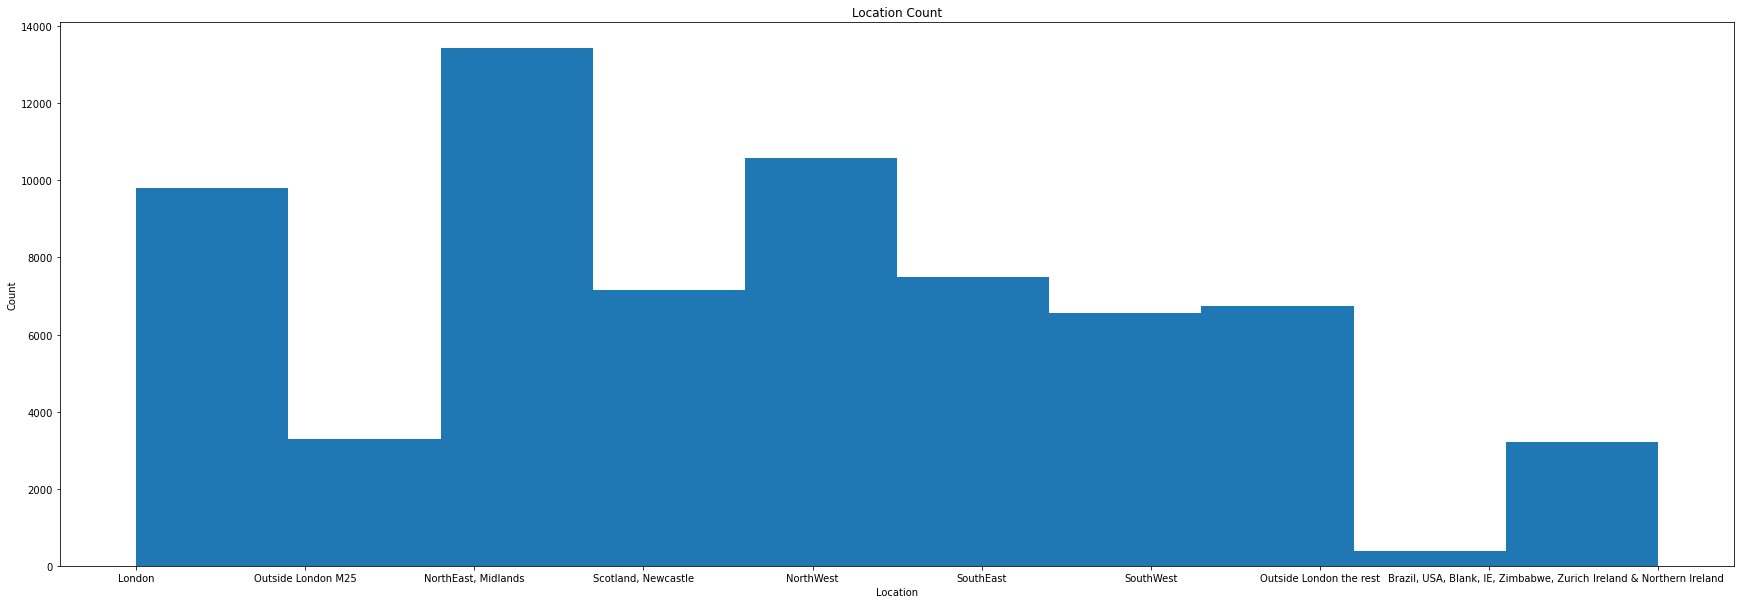

In [90]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Location)
plt.xlabel("Location")
plt.ylabel("Count")
plt.title("Location Count")

Text(0.5, 1.0, 'Product Count')

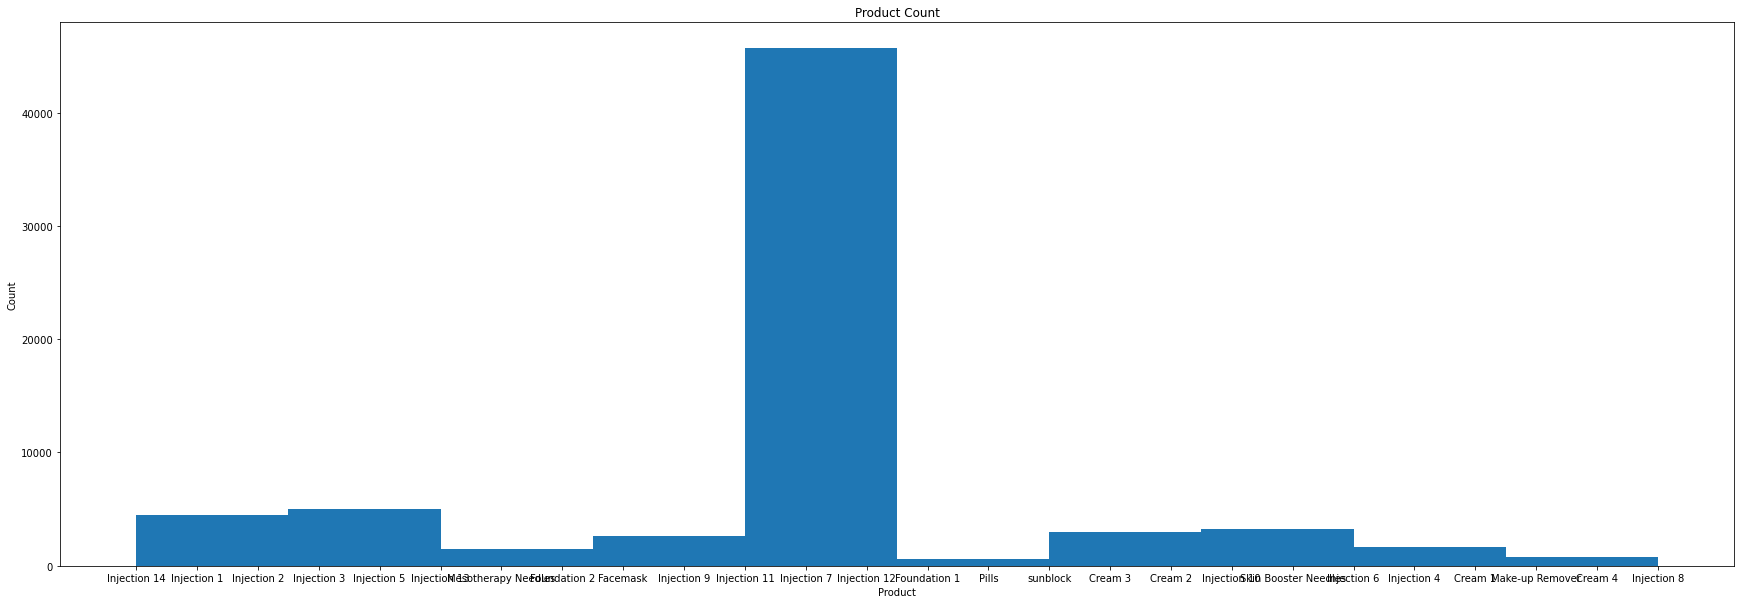

In [91]:
plt.figure(figsize=(30,10))
plt.hist(df_sales.Product)
plt.xlabel("Product")
plt.ylabel("Count")
plt.title("Product Count")

Text(0.5, 1.0, 'Pharmacy Distribution')

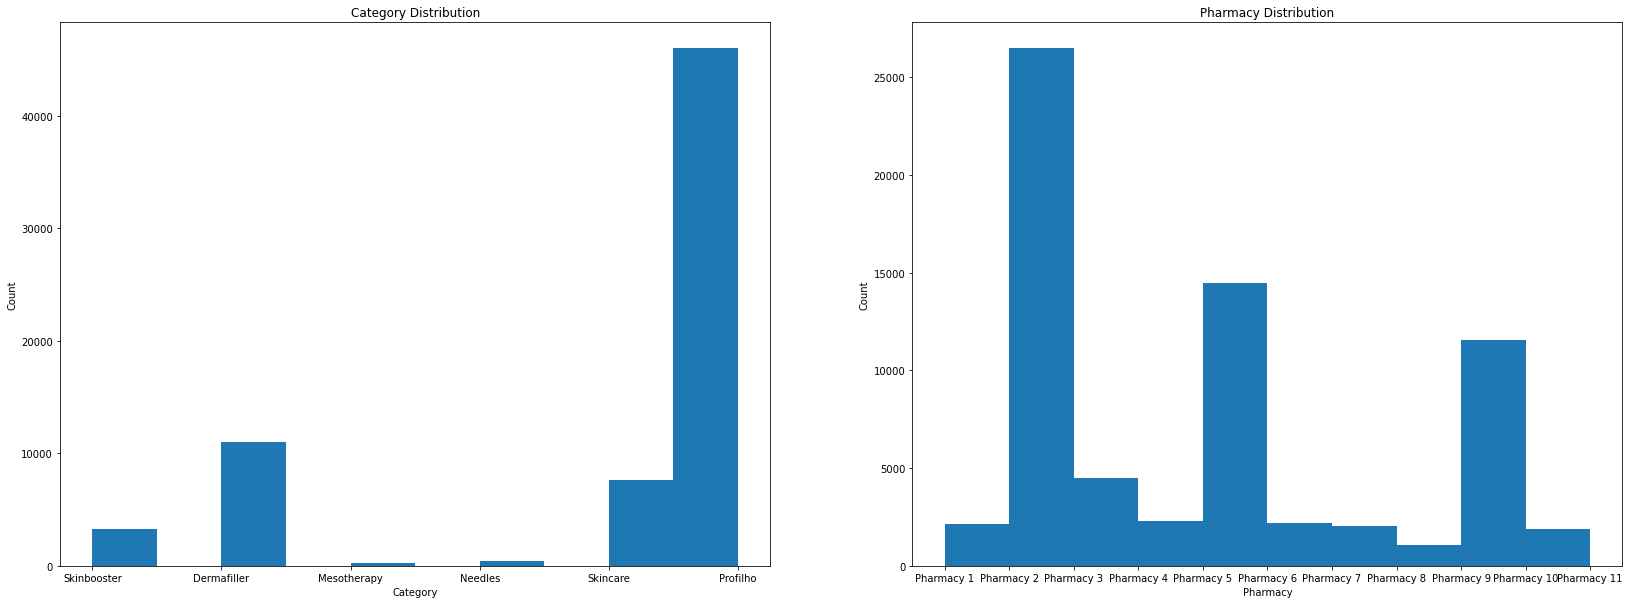

In [92]:
fig, ax = plt.subplots(1,2, figsize=(28,10)) #1 row, 2 colums   ax=array with indexes

ax[0].hist(df_sales.Category)
ax[0].set_xlabel("Category")
ax[0].set_ylabel("Count")
ax[0].set_title("Category Distribution")

ax[1].hist(df_sales.Pharmacy)
ax[1].set_xlabel("Pharmacy")
ax[1].set_ylabel("Count")
ax[1].set_title("Pharmacy Distribution")

## Boxplots

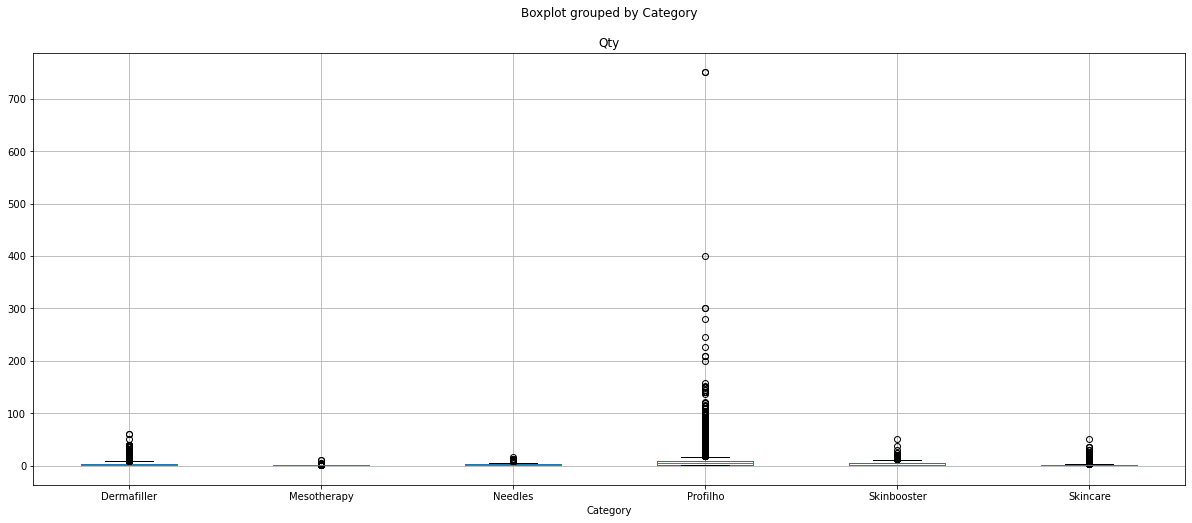

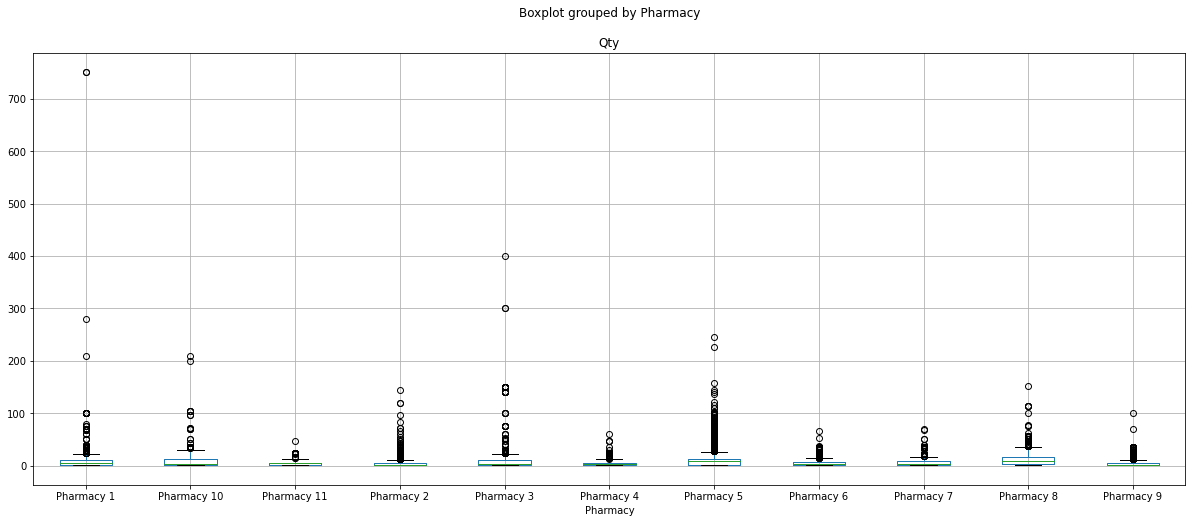

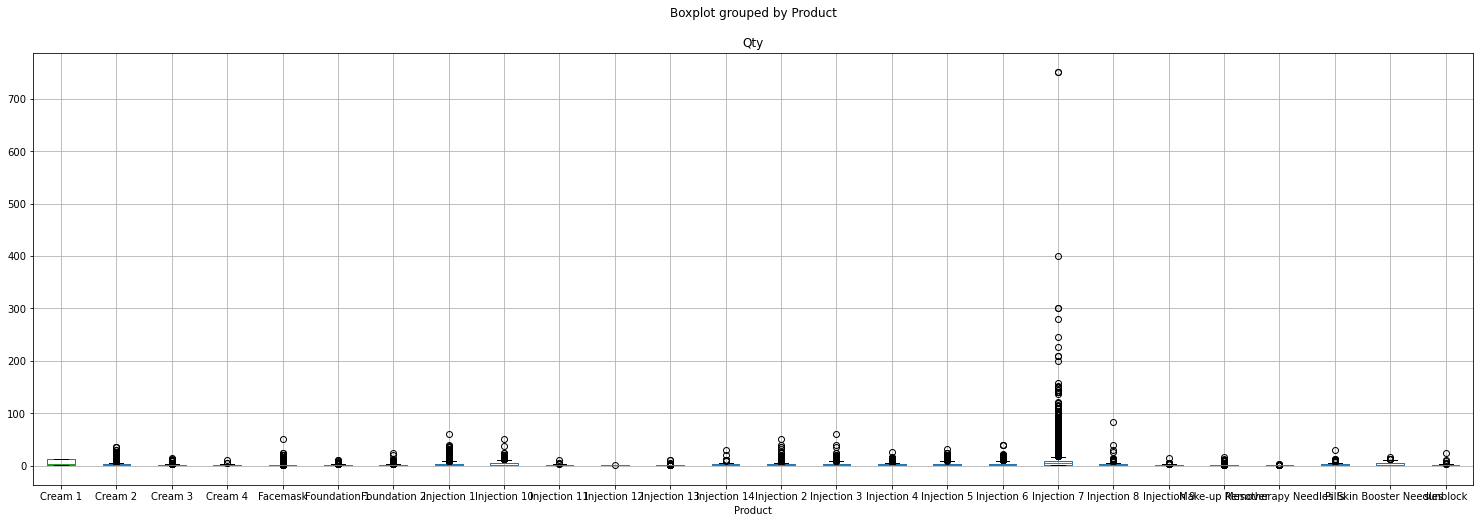

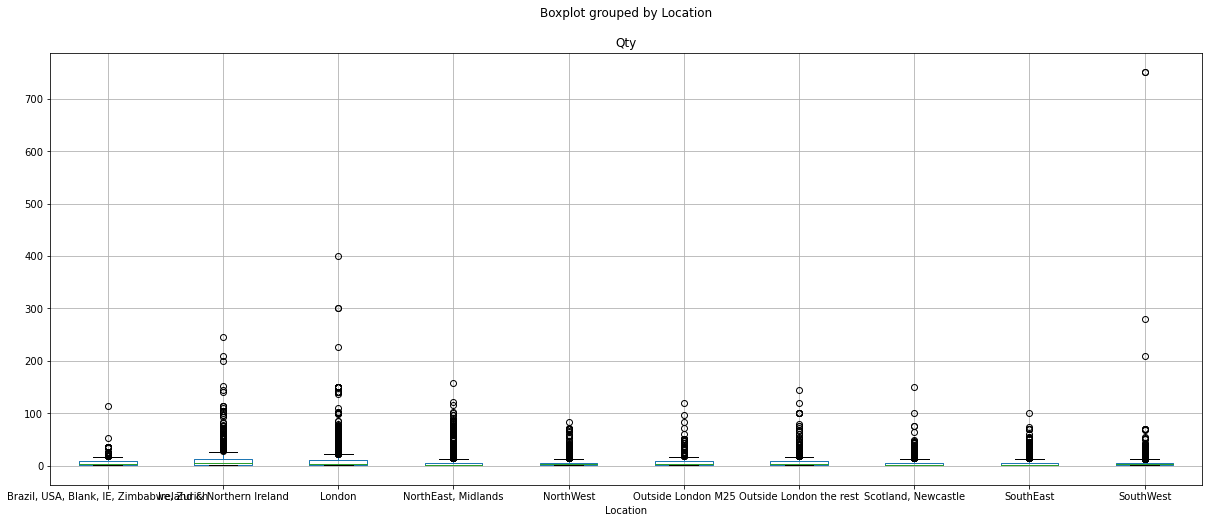

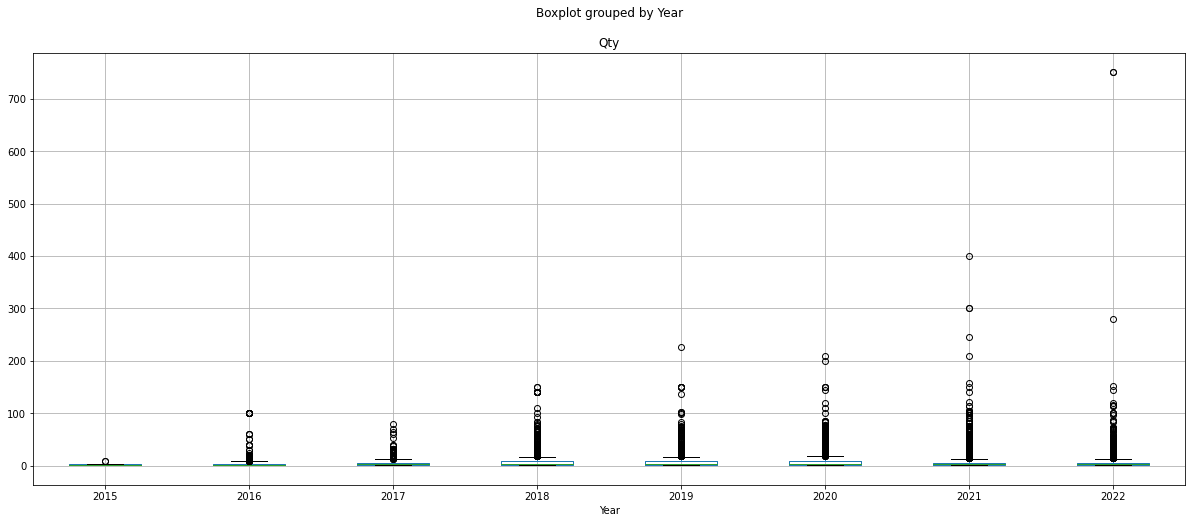

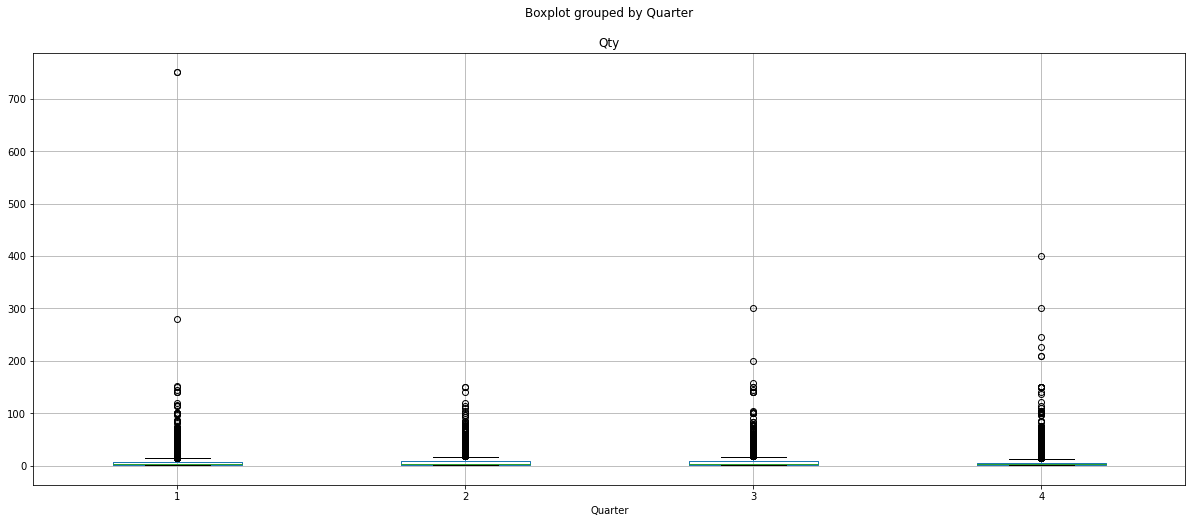

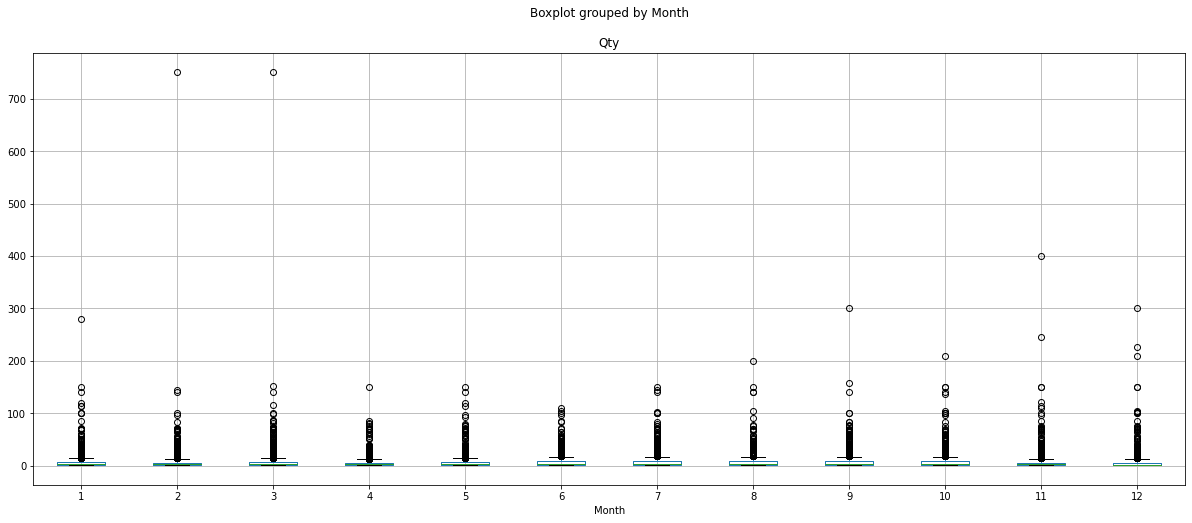

In [93]:
df_sales.boxplot('Qty', by='Category', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Pharmacy', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Product', figsize=(25,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Location', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Year', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Quarter', figsize=(20,8))
plt.title('Qty')
plt.show()

df_sales.boxplot('Qty', by='Month', figsize=(20,8))
plt.title('Qty')
plt.show()

## Pie Charts

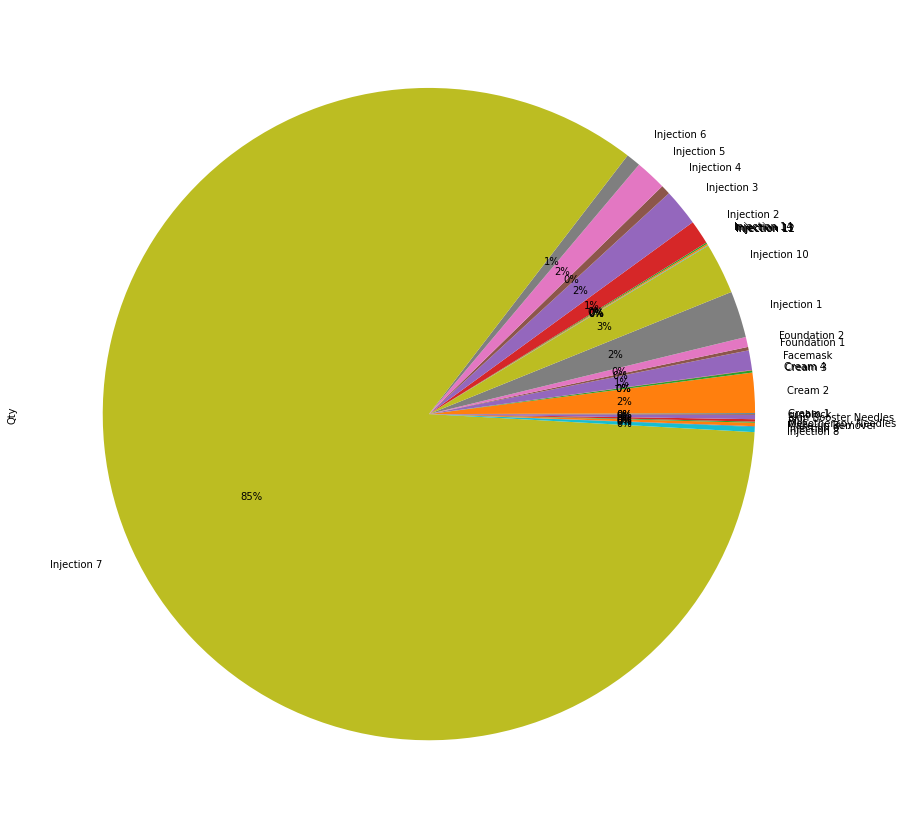

In [94]:

df_sales_products = df_sales.groupby(['Product']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

# fig, ax = plt.subplots()
# ax.pie(df_sales.Location)

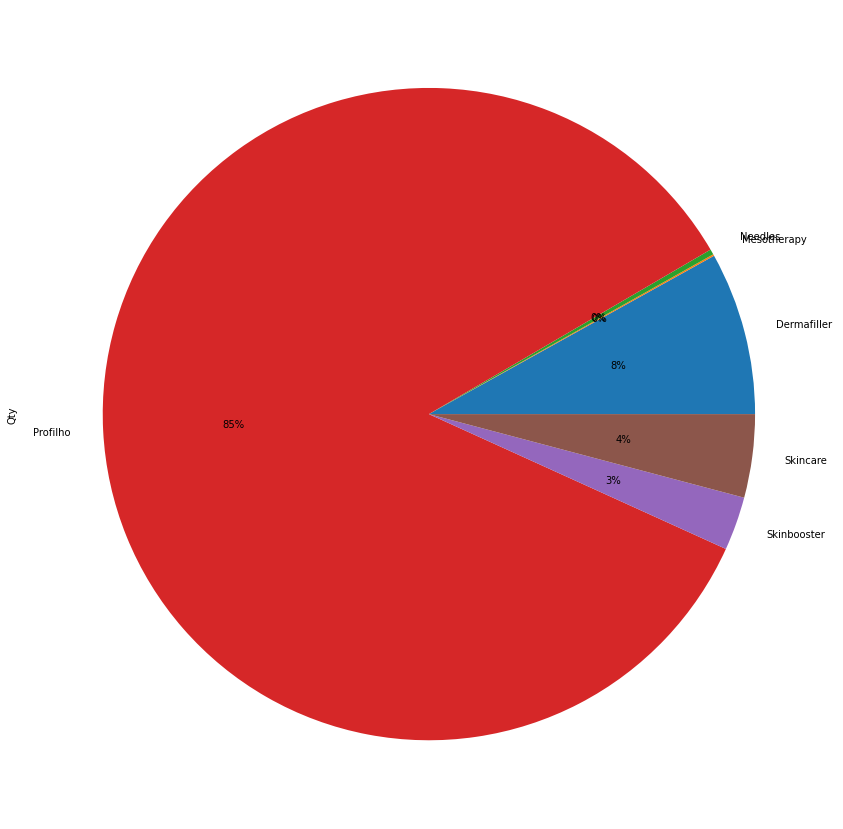

In [95]:
df_sales_products = df_sales.groupby(['Category']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

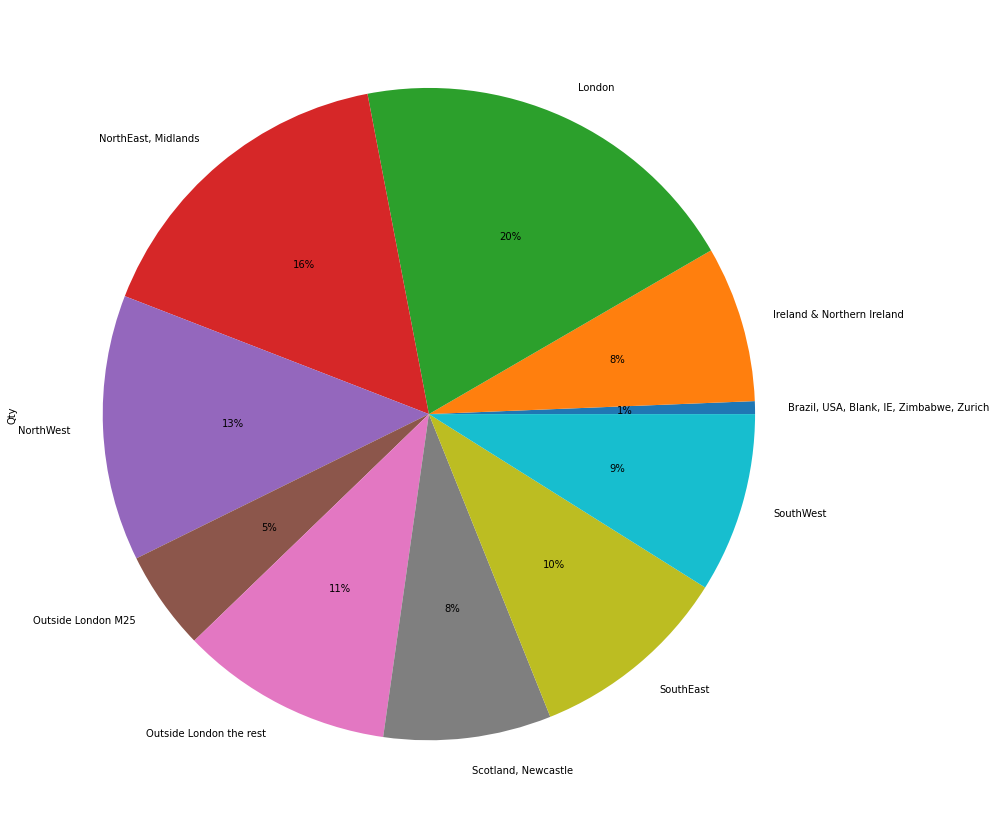

In [96]:
df_sales_products = df_sales.groupby(['Location']).sum().plot(kind='pie', y='Qty', autopct='%1.0f%%', legend=None, figsize=(15,15))

## Trend

In [97]:
df = df_sales[['Date', 'Qty']]

In [98]:
df = df.groupby(['Date'],as_index=False)['Qty'].agg("sum")
print(df)

        Date    Qty
0   1-1-2016     76
1   1-1-2017    328
2   1-1-2018   2328
3   1-1-2019   4948
4   1-1-2020   6204
..       ...    ...
72  1-9-2017   1234
73  1-9-2018   4642
74  1-9-2019   6613
75  1-9-2020  10034
76  1-9-2021  12261

[77 rows x 2 columns]


In [99]:
df['Date'] = pd.to_datetime(df.Date, format="%d-%m-%Y")
df = df.sort_values(by='Date')
df = df.set_index(df.Date)
df.drop('Date', axis = 1, inplace = True)
print('Column datatypes= \n',df.dtypes)
df

Column datatypes= 
 Qty    int64
dtype: object


,Qty
Date,
2015-11-01,9
2015-12-01,35
2016-01-01,76
2016-02-01,59
2016-03-01,144
...,...
2021-11-01,19099
2021-12-01,11719
2022-01-01,14598


Text(0.5, 1.0, 'Trend of the Time Series')

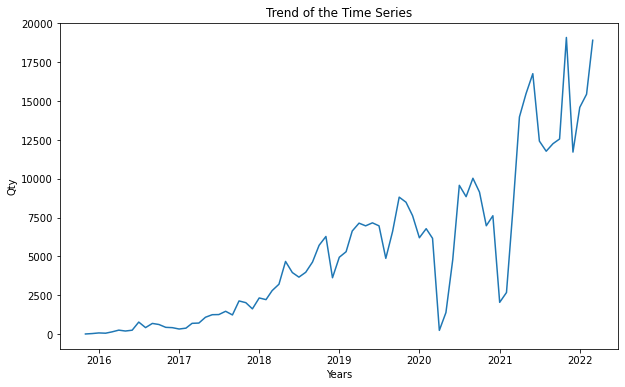

In [100]:
#To plot trend
plt.figure(figsize= (10,6))
plt.plot(df.index, df['Qty'])
plt.xlabel('Years')
plt.ylabel('Qty')
plt.title('Trend of the Time Series')

## Seasonality

<AxesSubplot:title={'center':'Seasonality of the Time Series'}, xlabel='Month', ylabel='Qty'>

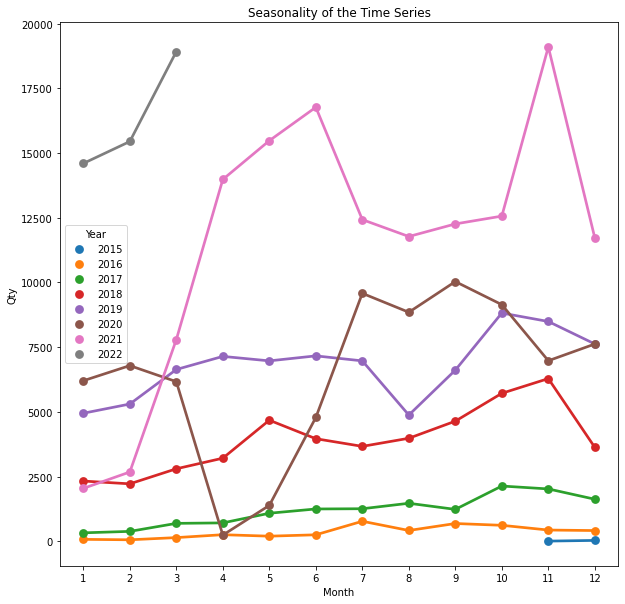

In [101]:
#To plot the seasonality we are going to create a temp dataframe and add columns for Month and Year values
df_temp = df.copy()
df_temp['Year'] = pd.DatetimeIndex(df_temp.index).year
df_temp['Month'] = pd.DatetimeIndex(df_temp.index).month
# Stacked line plot
plt.figure(figsize=(10,10))
plt.title('Seasonality of the Time Series')
sns.pointplot(x='Month',y='Qty',hue='Year',data=df_temp)

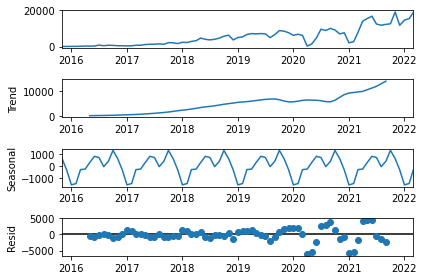

In [102]:
decomposition = sm.tsa.seasonal_decompose(df, model='additive') 
fig = decomposition.plot()

## Scatter

Text(0.5, 1.0, 'Year vs Qty')

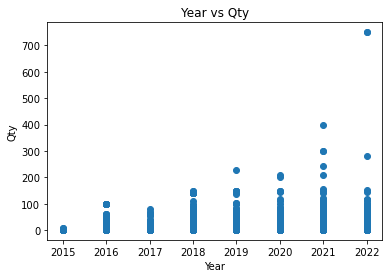

In [103]:
plt.scatter(df_sales.Year, df_sales.Qty)
plt.xlabel('Year')
plt.ylabel('Qty')
plt.title('Year vs Qty')

Text(0.5, 1.0, 'Month vs Qty')

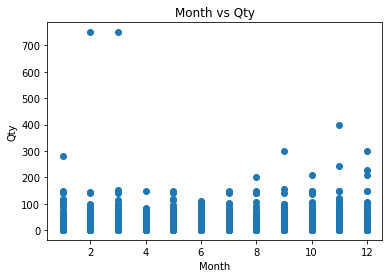

In [104]:
plt.scatter(df_sales.Month, df_sales.Qty)
plt.xlabel('Month')
plt.ylabel('Qty')
plt.title('Month vs Qty')

Text(0.5, 1.0, 'Quarter vs Qty')

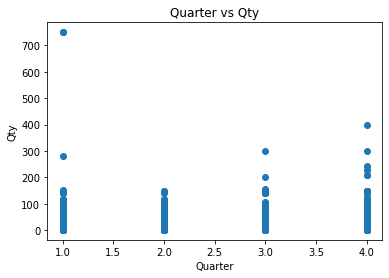

In [105]:
plt.scatter(df_sales.Quarter, df_sales.Qty)
plt.xlabel('Quarter')
plt.ylabel('Qty')
plt.title('Quarter vs Qty')